Dữ liệu 5 dòng đầu tiên:
                     PM10  PM2.5     CO   NO2    O3   SO2  AQI
time                                                          
2023-01-01 00:00:00  95.0   65.0  993.0  84.4  25.0  37.5  133
2023-01-01 01:00:00  86.1   59.0  846.0  70.2  28.0  30.8  133
2023-01-01 02:00:00  83.4   57.0  821.0  65.8  26.0  28.9  132
2023-01-01 03:00:00  80.1   54.8  834.0  64.0  22.0  28.5  131
2023-01-01 04:00:00  69.4   47.5  838.0  60.1  20.0  27.2  129

Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26880 entries, 2023-01-01 00:00:00 to 2026-01-24 23:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    26880 non-null  float64
 1   PM2.5   26880 non-null  float64
 2   CO      26880 non-null  float64
 3   NO2     26880 non-null  float64
 4   O3      26880 non-null  float64
 5   SO2     26880 non-null  float64
 6   AQI     26880 non-null  int64  
dtypes: float64(6), int64(1)
memory 

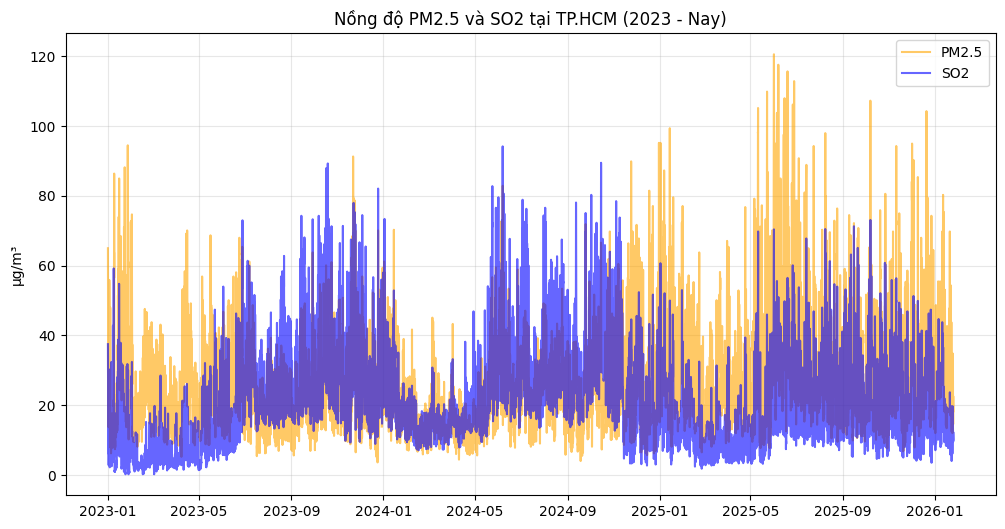

In [1]:
import requests
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

# 1. Lấy ngày hôm nay
today = date.today()
end_date_str = today.strftime("%Y-%m-%d")

# 2. Cấu hình URL và Parameters
url = "https://air-quality-api.open-meteo.com/v1/air-quality"

# Đã thêm 'sulphur_dioxide' vào chuỗi hourly
params = {
    "latitude": 10.7769, 
    "longitude": 106.7009,
    "hourly": "pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,us_aqi", 
    "start_date": "2023-01-01",
    "end_date": end_date_str,
    "timezone": "Asia/Bangkok"
}

# 3. Gọi API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    
    # Chuyển đổi dữ liệu JSON sang DataFrame
    hourly_data = data['hourly']
    df = pd.DataFrame(hourly_data)
    
    # Xử lý cột thời gian
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    
    # 4. Đổi tên cột (Đã thêm SO2)
    df.rename(columns={
        'us_aqi': 'AQI',
        'pm2_5': 'PM2.5',
        'pm10': 'PM10',
        'carbon_monoxide': 'CO',
        'nitrogen_dioxide': 'NO2',
        'ozone': 'O3',
        'sulphur_dioxide': 'SO2' # Cột mới thêm
    }, inplace=True)
    
    print("Dữ liệu 5 dòng đầu tiên:")
    print(df.head())
    print("\nThông tin DataFrame:")
    print(df.info())
    
    # Lưu ra CSV
    df.to_csv('hcm_air_quality_full.csv')
    
    # Vẽ biểu đồ so sánh PM2.5 và SO2 (Ví dụ thêm để bạn dễ quan sát)
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['PM2.5'], label='PM2.5', alpha=0.6, color='orange')
    plt.plot(df.index, df['SO2'], label='SO2', alpha=0.6, color='blue') # Vẽ thêm SO2
    plt.title('Nồng độ PM2.5 và SO2 tại TP.HCM (2023 - Nay)')
    plt.ylabel('µg/m³')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
else:
    print("Lỗi khi gọi API:", response.status_code)

In [2]:
df.tail()

,PM10,PM2.5,CO,NO2,O3,SO2,AQI
time,,,,,,,
2026-01-24 19:00:00,24.1,21.8,717.0,34.8,84.0,12.3,141
2026-01-24 20:00:00,20.4,18.4,652.0,33.8,73.0,12.0,129
2026-01-24 21:00:00,18.1,16.3,593.0,29.6,70.0,11.1,109
2026-01-24 22:00:00,16.9,15.1,547.0,26.5,67.0,10.4,85
2026-01-24 23:00:00,16.5,14.8,518.0,26.0,63.0,10.1,74


Kích thước dữ liệu: (26880, 13)
                     PM10  PM2.5     CO   NO2    O3   SO2  AQI   UV  \
time                                                                  
2023-01-01 00:00:00  95.0   65.0  993.0  84.4  25.0  37.5  133  0.0   
2023-01-01 01:00:00  86.1   59.0  846.0  70.2  28.0  30.8  133  0.0   
2023-01-01 02:00:00  83.4   57.0  821.0  65.8  26.0  28.9  132  0.0   
2023-01-01 03:00:00  80.1   54.8  834.0  64.0  22.0  28.5  131  0.0   
2023-01-01 04:00:00  69.4   47.5  838.0  60.1  20.0  27.2  129  0.0   

                     Temperature  Humidity  Rain  Wind_Speed  Wind_Dir  
time                                                                    
2023-01-01 00:00:00         23.5        65   0.0        11.3         9  
2023-01-01 01:00:00         23.0        67   0.0        10.3        12  
2023-01-01 02:00:00         22.5        70   0.0         7.9       360  
2023-01-01 03:00:00         22.0        73   0.0         8.3       360  
2023-01-01 04:00:00         21.9

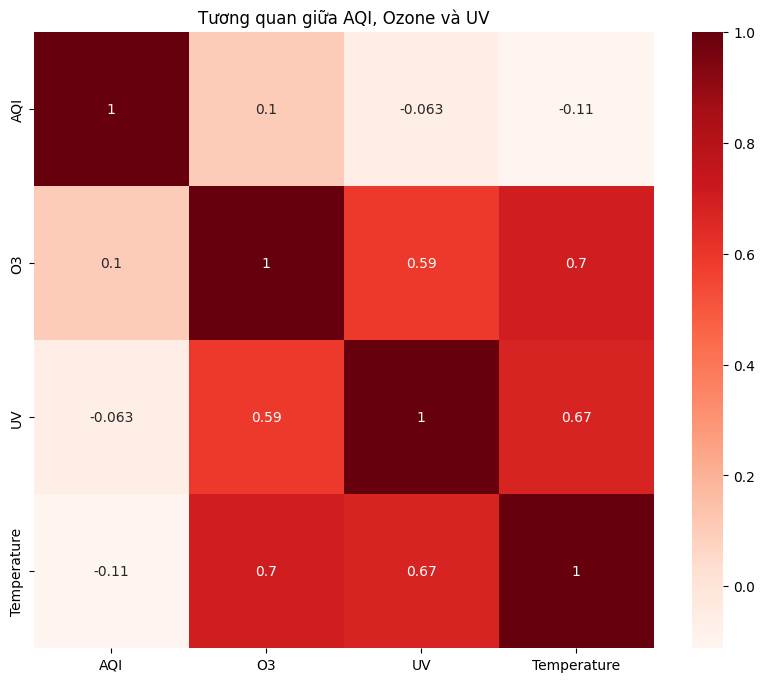

In [1]:
import requests
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

# Cấu hình
lat = 10.7769
lon = 106.7009
start_date = "2023-01-01"
end_date = date.today().strftime("%Y-%m-%d")
timezone = "Asia/Bangkok"

# 1. AIR QUALITY (Thêm 'uv_index' vào đây)
url_air = "https://air-quality-api.open-meteo.com/v1/air-quality"
# Thêm uv_index vào chuỗi hourly
params_air = {
    "latitude": lat, "longitude": lon,
    "start_date": start_date, "end_date": end_date,
    "timezone": timezone,
    "hourly": "pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,us_aqi,uv_index" 
}
res_air = requests.get(url_air, params=params_air)
df_air = pd.DataFrame(res_air.json()['hourly'])
df_air['time'] = pd.to_datetime(df_air['time'])
df_air.set_index('time', inplace=True)

# Rename (Thêm UV)
df_air.rename(columns={
    'us_aqi': 'AQI',
    'pm2_5': 'PM2.5',
    'pm10': 'PM10',
    'carbon_monoxide': 'CO',
    'nitrogen_dioxide': 'NO2',
    'ozone': 'O3',
    'sulphur_dioxide': 'SO2',
    'uv_index': 'UV' # Cột mới
}, inplace=True)

# 2. WEATHER (Giữ nguyên: Nhiệt, Ẩm, Mưa, Gió)
url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": lat, "longitude": lon,
    "start_date": start_date, "end_date": end_date,
    "timezone": timezone,
    "hourly": "temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_direction_10m"
}
res_weather = requests.get(url_weather, params=params_weather)
df_weather = pd.DataFrame(res_weather.json()['hourly'])
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather.set_index('time', inplace=True)

df_weather.rename(columns={
    'temperature_2m': 'Temperature',
    'relative_humidity_2m': 'Humidity',
    'precipitation': 'Rain',
    'wind_speed_10m': 'Wind_Speed',
    'wind_direction_10m': 'Wind_Dir'
}, inplace=True)

# 3. MERGE
df_final = pd.merge(df_air, df_weather, left_index=True, right_index=True)

print("Kích thước dữ liệu:", df_final.shape)
print(df_final.head())
df_final.to_csv('hcm_aqi_full_dataset.csv')

# Vẽ Heatmap để bạn thấy O3 và UV tương quan mạnh thế nào (Màu đỏ đậm)
plt.figure(figsize=(10, 8))
sns.heatmap(df_final[['AQI', 'O3', 'UV', 'Temperature']].corr(), annot=True, cmap='Reds')
plt.title('Tương quan giữa AQI, Ozone và UV')
plt.show()

In [3]:
import requests

# 1. Kiểm tra đơn vị của API KHÔNG KHÍ (Air Quality)
url_air = "https://air-quality-api.open-meteo.com/v1/air-quality"
params_air = {
    "latitude": 10.7769, 
    "longitude": 106.7009,
    "hourly": "pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,ozone,sulphur_dioxide,us_aqi,uv_index"
}

print("--- ĐƠN VỊ ĐO CHẤT LƯỢNG KHÔNG KHÍ ---")
response_air = requests.get(url_air, params=params_air)
if response_air.status_code == 200:
    units_air = response_air.json()['hourly_units']
    for key, unit in units_air.items():
        print(f"- {key}: {unit}")
else:
    print("Lỗi gọi API Air Quality")

print("\n" + "="*40 + "\n")

# 2. Kiểm tra đơn vị của API THỜI TIẾT (Weather)
url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 10.7769, 
    "longitude": 106.7009,
    "start_date": "2024-01-01", # Ngày giả định để lấy mẫu unit
    "end_date": "2024-01-02",
    "hourly": "temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_direction_10m"
}

print("--- ĐƠN VỊ ĐO THỜI TIẾT ---")
response_weather = requests.get(url_weather, params=params_weather)
if response_weather.status_code == 200:
    units_weather = response_weather.json()['hourly_units']
    for key, unit in units_weather.items():
        print(f"- {key}: {unit}")
else:
    print("Lỗi gọi API Weather")

--- ĐƠN VỊ ĐO CHẤT LƯỢNG KHÔNG KHÍ ---
- time: iso8601
- pm10: μg/m³
- pm2_5: μg/m³
- carbon_monoxide: μg/m³
- nitrogen_dioxide: μg/m³
- ozone: μg/m³
- sulphur_dioxide: μg/m³
- us_aqi: USAQI
- uv_index: 


--- ĐƠN VỊ ĐO THỜI TIẾT ---
- time: iso8601
- temperature_2m: °C
- relative_humidity_2m: %
- precipitation: mm
- wind_speed_10m: km/h
- wind_direction_10m: °
